In [63]:
import os
import sys
spark_path = r"C:\spark-2.3.1-bin-hadoop2.7" # spark installed folder
os.environ['SPARK_HOME'] = spark_path
sys.path.insert(0, spark_path + "/bin")
sys.path.insert(0, spark_path + "/python/pyspark/")
sys.path.insert(0, spark_path + "/python/lib/pyspark.zip")
sys.path.insert(0, spark_path + "/python/lib/py4j-0.10.7-src.zip")



from pyspark.sql import SparkSession
import pyspark.sql as sparksql
spark = SparkSession.builder.appName('stroke').getOrCreate()
train = spark.read.csv('C:/Users/pkdut/OneDrive/Desktop/2/train_2v.csv', inferSchema=True,header=True)


In [2]:
train

DataFrame[id: int, gender: string, age: double, hypertension: int, heart_disease: int, ever_married: string, work_type: string, Residence_type: string, avg_glucose_level: double, bmi: double, smoking_status: string, stroke: int]

In [64]:
test = spark.read.csv('C:/Users/pkdut/OneDrive/Desktop/2/test_2v.csv', inferSchema=True,header=True)

In [4]:
test


DataFrame[id: int, gender: string, age: double, hypertension: int, heart_disease: int, ever_married: string, work_type: string, Residence_type: string, avg_glucose_level: double, bmi: double, smoking_status: string]

In [5]:
train.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [6]:
train.dtypes

[('id', 'int'),
 ('gender', 'string'),
 ('age', 'double'),
 ('hypertension', 'int'),
 ('heart_disease', 'int'),
 ('ever_married', 'string'),
 ('work_type', 'string'),
 ('Residence_type', 'string'),
 ('avg_glucose_level', 'double'),
 ('bmi', 'double'),
 ('smoking_status', 'string'),
 ('stroke', 'int')]

In [7]:
train.head(5)

[Row(id=30669, gender='Male', age=3.0, hypertension=0, heart_disease=0, ever_married='No', work_type='children', Residence_type='Rural', avg_glucose_level=95.12, bmi=18.0, smoking_status=None, stroke=0),
 Row(id=30468, gender='Male', age=58.0, hypertension=1, heart_disease=0, ever_married='Yes', work_type='Private', Residence_type='Urban', avg_glucose_level=87.96, bmi=39.2, smoking_status='never smoked', stroke=0),
 Row(id=16523, gender='Female', age=8.0, hypertension=0, heart_disease=0, ever_married='No', work_type='Private', Residence_type='Urban', avg_glucose_level=110.89, bmi=17.6, smoking_status=None, stroke=0),
 Row(id=56543, gender='Female', age=70.0, hypertension=0, heart_disease=0, ever_married='Yes', work_type='Private', Residence_type='Rural', avg_glucose_level=69.04, bmi=35.9, smoking_status='formerly smoked', stroke=0),
 Row(id=46136, gender='Male', age=14.0, hypertension=0, heart_disease=0, ever_married='No', work_type='Never_worked', Residence_type='Rural', avg_glucose_l

In [10]:
test.describe().show()

+-------+------------------+------+------------------+-------------------+--------------------+------------+---------+--------------+------------------+------------------+---------------+
|summary|                id|gender|               age|       hypertension|       heart_disease|ever_married|work_type|Residence_type| avg_glucose_level|               bmi| smoking_status|
+-------+------------------+------+------------------+-------------------+--------------------+------------+---------+--------------+------------------+------------------+---------------+
|  count|             18601| 18601|             18601|              18601|               18601|       18601|    18601|         18601|             18601|             18010|          12850|
|   mean| 36747.36804472878|  null|42.056504489006024|0.09316703403042847|0.048061932154185256|        null|     null|          null| 104.3863593355191|28.545324819544625|           null|
| stddev|21053.151123778684|  null|22.528017622414048|0.2906

In [11]:
train.groupBy('stroke').count().show()

+------+-----+
|stroke|count|
+------+-----+
|     1|  783|
|     0|42617|
+------+-----+



In [12]:
train.createOrReplaceTempView('table')

In [13]:
spark.sql("SELECT work_type, COUNT(work_type) as work_type_count FROM table WHERE stroke == 1 GROUP BY work_type ORDER BY COUNT(work_type) DESC").show()
spark.sql("SELECT work_type, COUNT(work_type) as work_type_count FROM table WHERE stroke == 0 GROUP BY work_type ORDER BY COUNT(work_type) DESC").show()

+-------------+---------------+
|    work_type|work_type_count|
+-------------+---------------+
|      Private|            441|
|Self-employed|            251|
|     Govt_job|             89|
|     children|              2|
+-------------+---------------+

+-------------+---------------+
|    work_type|work_type_count|
+-------------+---------------+
|      Private|          24393|
|Self-employed|           6542|
|     children|           6154|
|     Govt_job|           5351|
| Never_worked|            177|
+-------------+---------------+



In [15]:
spark.sql("SELECT gender, COUNT(gender) as gender_count, COUNT(gender)*100/(SELECT COUNT(gender) FROM table WHERE gender == 'Male') as percentage FROM table WHERE stroke== 1 AND gender = 'Male' GROUP BY gender").show()
spark.sql("SELECT gender, COUNT(gender) as gender_count, COUNT(gender)*100/(SELECT COUNT(gender) FROM table WHERE gender == 'Female') as percentage FROM table WHERE stroke== 1 AND gender = 'Female' GROUP BY gender").show()


+------+------------+------------------+
|gender|gender_count|        percentage|
+------+------------+------------------+
|  Male|         352|1.9860076732114647|
+------+------------+------------------+

+------+------------+------------------+
|gender|gender_count|        percentage|
+------+------------+------------------+
|Female|         431|1.6793298266121177|
+------+------------+------------------+



In [16]:
spark.sql("SELECT COUNT(age)*100/(SELECT COUNT(age) FROM table WHERE stroke ==1) as percentage FROM table WHERE stroke == 1 AND age>=50").show()

+-----------------+
|       percentage|
+-----------------+
|91.57088122605364|
+-----------------+



In [17]:
train.describe().show()

+-------+-----------------+------+------------------+-------------------+-------------------+------------+---------+--------------+------------------+------------------+---------------+-------------------+
|summary|               id|gender|               age|       hypertension|      heart_disease|ever_married|work_type|Residence_type| avg_glucose_level|               bmi| smoking_status|             stroke|
+-------+-----------------+------+------------------+-------------------+-------------------+------------+---------+--------------+------------------+------------------+---------------+-------------------+
|  count|            43400| 43400|             43400|              43400|              43400|       43400|    43400|         43400|             43400|             41938|          30108|              43400|
|   mean|36326.14235023042|  null| 42.21789400921646|0.09357142857142857|0.04751152073732719|        null|     null|          null|104.48274999999916|28.605038390004545|       

In [65]:
# As this is categorical data, we will add one data type "No Info" for the missing one
train_f = train.na.fill('No Info', subset=['smoking_status'])
test_f = test.na.fill('No Info', subset=['smoking_status'])

In [66]:
# as this is numecial data , we will simple fill the missing values with mean
from pyspark.sql.functions import mean
mean = train_f.select(mean(train_f['bmi'])).collect()
mean_bmi = mean[0][0]
train_f = train_f.na.fill(mean_bmi,['bmi'])
test_f = test_f.na.fill(mean_bmi,['bmi'])


In [20]:
train_f.describe().show()

+-------+-----------------+------+------------------+-------------------+-------------------+------------+---------+--------------+------------------+------------------+--------------+-------------------+
|summary|               id|gender|               age|       hypertension|      heart_disease|ever_married|work_type|Residence_type| avg_glucose_level|               bmi|smoking_status|             stroke|
+-------+-----------------+------+------------------+-------------------+-------------------+------------+---------+--------------+------------------+------------------+--------------+-------------------+
|  count|            43400| 43400|             43400|              43400|              43400|       43400|    43400|         43400|             43400|             43400|         43400|              43400|
|   mean|36326.14235023042|  null| 42.21789400921646|0.09357142857142857|0.04751152073732719|        null|     null|          null|104.48274999999916|28.605038390005145|          n

In [21]:
test_f.describe().show()

+-------+------------------+------+------------------+-------------------+--------------------+------------+---------+--------------+------------------+------------------+--------------+
|summary|                id|gender|               age|       hypertension|       heart_disease|ever_married|work_type|Residence_type| avg_glucose_level|               bmi|smoking_status|
+-------+------------------+------+------------------+-------------------+--------------------+------------+---------+--------------+------------------+------------------+--------------+
|  count|             18601| 18601|             18601|              18601|               18601|       18601|    18601|         18601|             18601|             18601|         18601|
|   mean| 36747.36804472878|  null|42.056504489006024|0.09316703403042847|0.048061932154185256|        null|     null|          null| 104.3863593355191|28.547222068087624|          null|
| stddev|21053.151123778684|  null|22.528017622414048|0.290674182

In [67]:
from pyspark.ml.feature import StringIndexer
indexer1 = StringIndexer(inputCol="gender", outputCol="genderIndex")
indexer2 = StringIndexer(inputCol="ever_married", outputCol="ever_marriedIndex")
indexer3 = StringIndexer(inputCol="work_type", outputCol="work_typeIndex")
indexer4 = StringIndexer(inputCol="Residence_type", outputCol="Residence_typeIndex")
indexer5 = StringIndexer(inputCol="smoking_status", outputCol="smoking_statusIndex")

In [68]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=["genderIndex","ever_marriedIndex","work_typeIndex","Residence_typeIndex","smoking_statusIndex"],
                                 outputCols=["genderVec","ever_marriedVec","work_typeVec","Residence_typeVec","smoking_statusVec"])

In [69]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['genderVec',
 'age',
 'hypertension',
 'heart_disease',
 'ever_marriedVec',
 'work_typeVec',
 'Residence_typeVec',
 'avg_glucose_level',
 'bmi',
 'smoking_statusVec'],outputCol='features')

In [70]:
from pyspark.ml.classification import DecisionTreeClassifier
dtc = DecisionTreeClassifier(labelCol='stroke',featuresCol='features')

In [71]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[indexer1, indexer2, indexer3, indexer4, indexer5, encoder, assembler, dtc])

In [72]:
# splitting training and validation data
train_data,val_data = train_f.randomSplit([0.7,0.3])

# training model pipeline with data
model = pipeline.fit(train_data)

In [73]:
dtc_predictions = model.transform(val_data)

# Select example rows to display.
dtc_predictions.select("prediction","probability", "stroke", "features").show(5)

+----------+--------------------+------+--------------------+
|prediction|         probability|stroke|            features|
+----------+--------------------+------+--------------------+
|       0.0|[0.99113737075332...|     0|(16,[1,2,5,6,11,1...|
|       0.0|[0.99927698647964...|     0|(16,[0,2,5,6,10,1...|
|       0.0|[0.94779366065879...|     0|(16,[0,2,5,6,10,1...|
|       0.0|[0.99927698647964...|     0|(16,[1,2,8,11,12,...|
|       0.0|[0.94779366065879...|     0|(16,[0,2,5,6,11,1...|
+----------+--------------------+------+--------------------+
only showing top 5 rows



In [81]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Select (prediction, true label) and compute test error
acc_evaluator = MulticlassClassificationEvaluator(labelCol="stroke", predictionCol="prediction", metricName="accuracy")
acc_evaluator1 = MulticlassClassificationEvaluator(labelCol="stroke", predictionCol="prediction", metricName="f1")
acc_evaluator2 = BinaryClassificationEvaluator( rawPredictionCol="prediction",labelCol="stroke", metricName="areaUnderROC")
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
dtc_acc1 = acc_evaluator1.evaluate(dtc_predictions)
dtc_acc2 = acc_evaluator2.evaluate(dtc_predictions)
print('A Decision Tree algorithm had an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('A Decision Tree algorithm had an accuracy of: {0:2.2f}%'.format(dtc_acc1*100))
print('A Decision Tree algorithm had an accuracy of: {0:2.2f}%'.format(dtc_acc2*100))

A Decision Tree algorithm had an accuracy of: 98.11%
A Decision Tree algorithm had an accuracy of: 97.18%
A Decision Tree algorithm had an accuracy of: 50.00%


In [30]:
# now predicting the labels for test data
test_pred = model.transform(test_f)
test_selected = test_pred.select("id", "features", "prediction","probability")
test_selected.limit(5).toPandas()

,id,features,prediction,probability
0,36306,"(0.0, 1.0, 80.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,...",0.0,"[0.9404915912031048, 0.059508408796895215]"
1,61829,"(1.0, 0.0, 74.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0,...",0.0,"[0.8240740740740741, 0.17592592592592593]"
2,14152,"(1.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",0.0,"[0.9998257991464158, 0.00017420085358418256]"
3,12997,"(0.0, 1.0, 28.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...",0.0,"[0.9998257991464158, 0.00017420085358418256]"
4,40801,"(1.0, 0.0, 63.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",0.0,"[0.9850675515525006, 0.014932448447499408]"


In [27]:
import pandas as pd
df=pd.DataFrame(train.take(5), columns=train.columns).transpose()
df


,0,1,2,3,4
id,30669,30468,16523,56543,46136
gender,Male,Male,Female,Female,Male
age,3,58,8,70,14
hypertension,0,1,0,0,0
heart_disease,0,0,0,0,0
ever_married,No,Yes,No,Yes,No
work_type,children,Private,Private,Private,Never_worked
Residence_type,Rural,Urban,Urban,Rural,Rural
avg_glucose_level,95.12,87.96,110.89,69.04,161.28
bmi,18,39.2,17.6,35.9,19.1


In [28]:
train_data, test_data = train.randomSplit([0.8, 0.2])



In [29]:
train_data.describe().toPandas().transpose()



,0,1,2,3,4
summary,count,mean,stddev,min,max
id,34711,36431.5460516839,21062.155305279797,1,72943
gender,34711,None,None,Female,Other
age,34711,42.18346806487844,22.51816458188748,0.08,82.0
hypertension,34711,0.09423525683500908,0.29215994299882314,0,1
heart_disease,34711,0.04646941891619372,0.21050246696769684,0,1
ever_married,34711,None,None,No,Yes
work_type,34711,None,None,Govt_job,children
Residence_type,34711,None,None,Rural,Urban
avg_glucose_level,34711,104.34390250929103,43.03271711899894,55.0,281.59


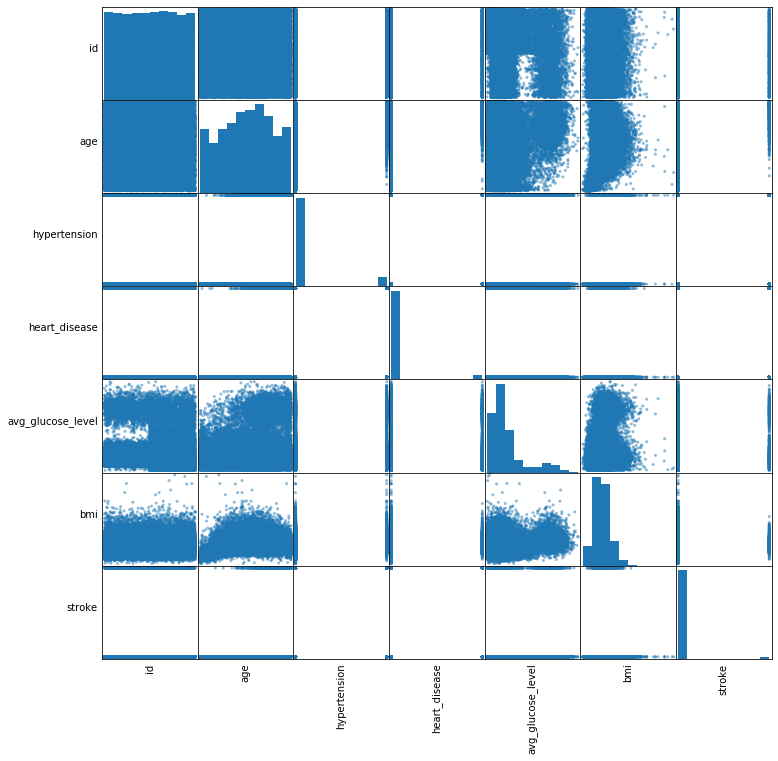

In [30]:
import matplotlib.pyplot as plt
# Correlation analysis
numeric_features = [t[0] for t in
 train_data.dtypes if t[1] == "int" or t[1]== "double"]
sample_d=train_data.select(numeric_features) \
.sample(False,1.0).toPandas()

axs = pd.plotting.scatter_matrix(sample_d, figsize=(12, 12))
# Rotate axis labels and remove axis ticks
n = len(sample_d.columns)
for i in range(n):
 v = axs[i, 0]
 v.yaxis.label.set_rotation(0)
 v.yaxis.label.set_ha('right')
 v.set_yticks(())
 h = axs[n-1, i]
 h.xaxis.label.set_rotation(90)
 h.set_xticks(())
#Show the data plotting
plt.show()
